In [120]:
import numpy as np
import matplotlib.pyplot as plt
from far_heaa.visualization_toolkit import visualizations
from far_heaa.io.metadata_handler import MetadataHandler
import re
from far_heaa.grids_and_combinations.grid_creation import CompositionGrid

In [121]:
mH = MetadataHandler()
meta_data = mH.meta_data

In [153]:
meta_data['flags']['im_flag'] = False
viz = visualizations.Visualizations(
    meta_data=meta_data,
    lattice = 'BCC'
)


composition = ['Cr', 'V', 'W']

temp_grid = list(np.linspace(300, 3000, 20))
conv_hull = viz.grid_iterator.temp_iterator(composition=composition, temp_grid=temp_grid)

In [154]:
lattice = 'BCC'

In [155]:
mol_grid = CompositionGrid.create_mol_grid(len(composition), 30)
print(len(mol_grid))

mol_grid, e_hull, _ = viz.grid_iterator.e_hull_across_grid(
            composition=composition,
            mol_grid_size=mol_grid,
            lattice=lattice,
            single_temp_flag=True,
            temp_gradation=temp_grid[0],
        )

466


In [156]:
stable_entries_mask = np.isclose(e_hull, 0, atol = 1e-3, rtol = 1e-3)
unstable_entries_mask = np.logical_not(stable_entries_mask)

In [157]:
def clean_string_general(s):
    # Remove numbers and spaces, keeping element symbols and suffix
    return re.sub(
        r"((?:[A-Za-z]+\d+\s?)+)(_?[A-Za-z0-9]+)",  # Match element-symbol-number patterns and suffix
        lambda m: "".join(re.findall(r"[A-Za-z]+", m.group(1))) + m.group(2),  # Keep only symbols and append suffix
        s
    )

In [158]:
stable_decomposition_products = stable_entries_mask * mol_grid
unstable_decomposition_products = unstable_entries_mask * mol_grid

In [159]:
full_phase_diagram = np.zeros((len(temp_grid), len(mol_grid))).astype(str)
for idx, j in enumerate(temp_grid):
    isotherm = []
    for i in range(len(mol_grid)):
        
        # if sum(mol_grid[i]) == 1:
        decomp, e_hull = viz.grid_iterator.find_decomp_products(mol_ratio = mol_grid[i],
                                               composition = composition,
                                               temperature = j,
                                               lattice = lattice)
        if decomp is not None:
            decomp_products_cleaned = '+'.join(decomp['Product'].tolist())
            #remove numbers in string
            decomp_products_cleaned = clean_string_general(decomp_products_cleaned)
        
            isotherm.append(decomp_products_cleaned)
        else:
            isotherm.append( ''.join(composition) + f'_{lattice}')
        
    full_phase_diagram[idx] = np.array(isotherm)
    break
                

In [160]:
unique = np.unique(full_phase_diagram)
counter_dict = dict(zip(unique, range(len(unique))))
print(counter_dict)

{'0.0': 0, 'CrVW_BCC': 1, 'CrVW_BCC+CrV_BCC+VW_BCC': 2, 'CrV_BCC+CrV_BCC+VW_BCC': 3, 'CrV_BCC+VW_BCC+CrV_BCC': 4, 'CrV_BCC+VW_BCC+Cr_BCC': 5, 'CrV_BCC+VW_BCC+VW_BCC': 6, 'Cr_BCC': 7, 'VW_BCC+CrV_BCC+VW_BCC': 8, 'VW_BCC+VW_BCC+CrV_BCC': 9, 'VW_BCC+W_BCC+Cr_BCC': 10, 'V_BCC': 11, 'W_BCC': 12, 'W_BCC+Cr_BCC': 13}


In [161]:
full_phas_diagram_label = np.vectorize(counter_dict.get)(full_phase_diagram).astype(int)
# full_phas_diagram_label = full_phas_diagram_label[:, :-1
print(full_phas_diagram_label)

[[12  1  1 ...  1  7  4]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [162]:
print(full_phas_diagram_label[0])
full_phase_diagram[0]

[12  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 11 13 10 10  8  8  6  6  6  6  9  9  6  6  8  8  8  8  6
  6  6  6  8  1  1  1  1  1  1  1 13 10  5  8  4  6  6  6  6  9  9  6  6
  8  8  8  8  6  6  6  6  8  8  2  1  1  1  1 13 10  5  8  4  6  3  6  6
  9  9  6  6  8  8  8  8  6  6  6  6  8  8  2  1  1  1 13 10  5  8  4  6
  3  6  4  9  4  6  4  8  8  8  4  6  3  6  4  8  3  2  1  1 13 10  5  8
  4  6  3  6  4  9  4  6  4  8  3  8  4  6  3  6  4  8  3  1  1 13 10  5
  8  4  6  3  6  4  9  4  6  4  8  3  8  4  6  3  6  4  8  3  1 13 10  5
  8  4  6  3  6  4  9  4  6  4  8  3  8  4  6  3  6  4  8  1 13 10  5  8
  4  6  3  6  4  9  4  6  4  8  3  8  4  6  3  6  4  1 13 10  5  8  4  6
  3  6  4  9  4  6  4  8  3  8  4  6  3  4  1 13 10  5  8  4  6  3  6  4
  9  4  6  4  8  3  8  4  3  3  1 13 10  5  8  4  6  3  6  4  9  4  6  4
  8  3  4  4  3  1 13 10  5  8  4  6  3  6  4  9  4  6  4  3  3  4  4  1
 13 10  5  8  4  6  3  6  4  9  4  4  4  3  3  4  1

array(['W_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC',
       'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC',
       'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC',
       'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC',
       'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC',
       'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'CrVW_BCC', 'V_BCC',
       'W_BCC+Cr_BCC', 'VW_BCC+W_BCC+Cr_BCC', 'VW_BCC+W_BCC+Cr_BCC',
       'VW_BCC+CrV_BCC+VW_BCC', 'VW_BCC+CrV_BCC+VW_BCC',
       'CrV_BCC+VW_BCC+VW_BCC', 'CrV_BCC+VW_BCC+VW_BCC',
       'CrV_BCC+VW_BCC+VW_BCC', 'CrV_BCC+VW_BCC+VW_BCC',
       'VW_BCC+VW_BCC+CrV_BCC', 'VW_BCC+VW_BCC+CrV_BCC',
       'CrV_BCC+VW_BCC+VW_BCC', 'CrV_BCC+VW_BCC+VW_BCC',
       'VW_BCC+CrV_BCC+VW_BCC', 'VW_BCC+CrV_BCC+VW_BCC',
       'VW_BCC+CrV_BCC+VW_BCC', 'VW_BCC+CrV_BCC+VW_BCC',
       'CrV_BCC+VW_BCC+VW_BCC', 'CrV_BCC+VW_BCC+VW_BCC',
       'CrV_BCC+VW_BCC+VW_BCC', 'CrV_BCC+VW_BCC+VW_BCC',
       'VW_BCC+CrV_BCC

In [163]:
t, l, r = mol_grid[:, 0], mol_grid[:, 1], mol_grid[:, 2]
ax = plt.sub

AttributeError: module 'matplotlib.pyplot' has no attribute 'sub'

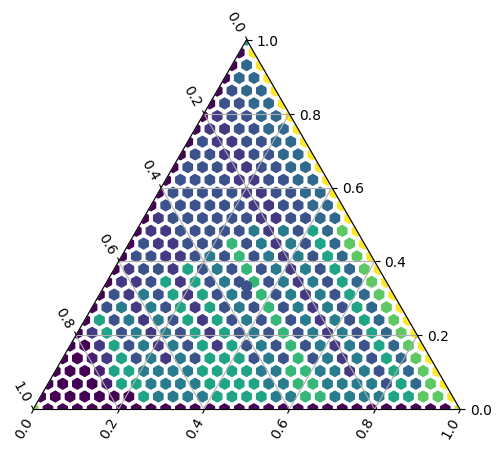

In [165]:
import mpltern
t, l, r = mol_grid[:, 0], mol_grid[:, 1], mol_grid[:, 2]
fig = plt.figure()

ax = fig.add_subplot(projection="ternary")
ax.grid()

ax.scatter(t, l, r, c=full_phas_diagram_label[0],marker="h", s=60, cmap = 'viridis')



In [164]:
print(counter_dict)

{'0.0': 0, 'CrVW_BCC': 1, 'CrVW_BCC+CrV_BCC+VW_BCC': 2, 'CrV_BCC+CrV_BCC+VW_BCC': 3, 'CrV_BCC+VW_BCC+CrV_BCC': 4, 'CrV_BCC+VW_BCC+Cr_BCC': 5, 'CrV_BCC+VW_BCC+VW_BCC': 6, 'Cr_BCC': 7, 'VW_BCC+CrV_BCC+VW_BCC': 8, 'VW_BCC+VW_BCC+CrV_BCC': 9, 'VW_BCC+W_BCC+Cr_BCC': 10, 'V_BCC': 11, 'W_BCC': 12, 'W_BCC+Cr_BCC': 13}
